Corona Tweets Text Preprocessing (NLTK)

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import sklearn
import seaborn as sns
from bs4 import BeautifulSoup
import re
import unicodedata
from contractions import CONTRACTION_MAP, expand_contractions

In [2]:
# load data
data = pd.read_csv('tripadvisor_hotel_reviews.csv')
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [3]:
data.tail()

,Review,Rating
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1
20490,"people talking, ca n't believe excellent ratin...",2


In [4]:
data['Rating'].unique()

array([4, 2, 3, 5, 1], dtype=int64)

In [5]:
# change label name & scale to between 0-4
data['Label'] = data['Rating'].map({1:0, 2:1, 3:2, 4:3, 5:4})
data = data.iloc[:, :3:2]
data.head()

,Review,Label
0,nice hotel expensive parking got good deal sta...,3
1,ok nothing special charge diamond member hilto...,1
2,nice rooms not 4* experience hotel monaco seat...,2
3,"unique, great stay, wonderful time hotel monac...",4
4,"great stay great stay, went seahawk game aweso...",4


In [6]:
data.tail()

,Review,Label
20486,"best kept secret 3rd time staying charm, not 5...",4
20487,great location price view hotel great quick pl...,3
20488,"ok just looks nice modern outside, desk staff ...",1
20489,hotel theft ruined vacation hotel opened sept ...,0
20490,"people talking, ca n't believe excellent ratin...",1


In [7]:
print(f'Null Data: \n{data.isnull().sum()}\n')
print('Empty Cell: \n{}'.format(data[data['Review'] == ''].index))

Null Data: 
Review    0
Label     0
dtype: int64

Empty Cell: 
Int64Index([], dtype='int64')


In [8]:
data['Review'][187]

'stayed saturday night stop flying home day, floor overlooking expressway, hear noise, restaurants walked square 4 blocks hotel nothing open 2000 saturday hotel restaurants decided not good choice, bed comfortable, today checking bank statements unexplained 104 charge credit card, real test phone calls correct mistake really just hotel, nothing special bit isolated close expressway,  '

In [9]:
# remove html elements
no_html = [i.get_text() for i in [BeautifulSoup(i, "html.parser") for i in data['Review']]]

In [10]:
no_html[187]

'stayed saturday night stop flying home day, floor overlooking expressway, hear noise, restaurants walked square 4 blocks hotel nothing open 2000 saturday hotel restaurants decided not good choice, bed comfortable, today checking bank statements unexplained 104 charge credit card, real test phone calls correct mistake really just hotel, nothing special bit isolated close expressway,  '

In [11]:
# remove urls
url_pattern = r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)'
no_url = [re.sub(url_pattern, '', i) for i in no_html]

In [12]:
no_url[187]

'stayed saturday night stop flying home day, floor overlooking expressway, hear noise, restaurants walked square 4 blocks hotel nothing open 2000 saturday hotel restaurants decided not good choice, bed comfortable, today checking bank statements unexplained 104 charge credit card, real test phone calls correct mistake really just hotel, nothing special bit isolated close expressway,  '

In [13]:
# remove accented characters
no_accent = [unicodedata.normalize('NFKD', i).encode('ascii', 'ignore').decode('utf-8', 'ignore') for i in no_url]

In [14]:
no_accent[187]

'stayed saturday night stop flying home day, floor overlooking expressway, hear noise, restaurants walked square 4 blocks hotel nothing open 2000 saturday hotel restaurants decided not good choice, bed comfortable, today checking bank statements unexplained 104 charge credit card, real test phone calls correct mistake really just hotel, nothing special bit isolated close expressway,  '

In [15]:
# LEARN THIS
# expanding contractions
expanded_contractions = [expand_contractions(i) for i in no_accent]

In [16]:
expanded_contractions[187]

'stayed saturday night stop flying home day, floor overlooking expressway, hear noise, restaurants walked square 4 blocks hotel nothing open 2000 saturday hotel restaurants decided not good choice, bed comfortable, today checking bank statements unexplained 104 charge credit card, real test phone calls correct mistake really just hotel, nothing special bit isolated close expressway,  '

In [17]:
# remove special characters (digits included)
sp_chr_pattern = r'[^a-zA-Z\s]'
no_sp_chr = [re.sub(sp_chr_pattern, '', i) for i in expanded_contractions]

In [18]:
no_sp_chr[187]

'stayed saturday night stop flying home day floor overlooking expressway hear noise restaurants walked square  blocks hotel nothing open  saturday hotel restaurants decided not good choice bed comfortable today checking bank statements unexplained  charge credit card real test phone calls correct mistake really just hotel nothing special bit isolated close expressway  '

In [19]:
# remove multiple spaces
single_space = [re.sub('\s+',' ', i) for i in no_sp_chr]

In [20]:
single_space[187]

'stayed saturday night stop flying home day floor overlooking expressway hear noise restaurants walked square blocks hotel nothing open saturday hotel restaurants decided not good choice bed comfortable today checking bank statements unexplained charge credit card real test phone calls correct mistake really just hotel nothing special bit isolated close expressway '

In [21]:
# lowercasing
lower = [i.lower() for i in single_space]

In [22]:
lower[187]

'stayed saturday night stop flying home day floor overlooking expressway hear noise restaurants walked square blocks hotel nothing open saturday hotel restaurants decided not good choice bed comfortable today checking bank statements unexplained charge credit card real test phone calls correct mistake really just hotel nothing special bit isolated close expressway '

In [23]:
# stopwords removal
stopword = stopwords.words('english')
without_stopwords = [' '.join(z) for z in [[y for i, y in enumerate(x.split()) if y not in stopword] for x in lower]]

In [24]:
without_stopwords[187]

'stayed saturday night stop flying home day floor overlooking expressway hear noise restaurants walked square blocks hotel nothing open saturday hotel restaurants decided good choice bed comfortable today checking bank statements unexplained charge credit card real test phone calls correct mistake really hotel nothing special bit isolated close expressway'

In [25]:
# stemming
steme = nltk.porter.PorterStemmer()
stemed = [' '.join(z) for z in [[steme.stem(y) for i, y in enumerate(x.split())]for x in without_stopwords]] 

In [26]:
stemed[187]

'stay saturday night stop fli home day floor overlook expressway hear nois restaur walk squar block hotel noth open saturday hotel restaur decid good choic bed comfort today check bank statement unexplain charg credit card real test phone call correct mistak realli hotel noth special bit isol close expressway'

In [27]:
# # not really good
# # lemmatization
# lemmatizer = WordNetLemmatizer()
# lemmatized = [' '.join(z) for z in [[lemmatizer.lemmatize(y) for i, y in enumerate(x.split())]for x in without_stopwords]]

In [28]:
# lemmatized[187]

In [29]:
data['preprocessed_data'] = stemed
data = data.iloc[:, 1:]
data.head()

,Label,preprocessed_data
0,3,nice hotel expens park got good deal stay hote...
1,1,ok noth special charg diamond member hilton de...
2,2,nice room experi hotel monaco seattl good hote...
3,4,uniqu great stay wonder time hotel monaco loca...
4,4,great stay great stay went seahawk game awesom...


In [30]:
data.tail()

,Label,preprocessed_data
20486,4,best kept secret rd time stay charm star ca nt...
20487,3,great locat price view hotel great quick place...
20488,1,ok look nice modern outsid desk staff nt parti...
20489,0,hotel theft ruin vacat hotel open sept guest w...
20490,1,peopl talk ca nt believ excel rate hotel nt ye...


In [31]:
print(f'Null Data: \n{data.isnull().sum()}\n')
print('Empty Cell: \n{}'.format(data[data['preprocessed_data'] == ''].index))

Null Data: 
Label                0
preprocessed_data    0
dtype: int64

Empty Cell: 
Int64Index([], dtype='int64')


In [32]:
data.to_csv('dataset_preprocessed_org.csv', index=False)

Downscaled

In [33]:
len(data)

20491

In [34]:
data['Label'] = data['Label'].map({0:'NEG', 1:'NEG', 2:'NEU', 3:'POS', 4:'POS'})

<AxesSubplot:xlabel='Label', ylabel='count'>

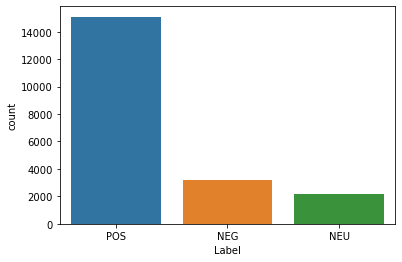

In [35]:
sns.countplot(data.Label)

In [36]:
max_class_length = len(data[data['Label'] == 'NEU'])
pos = data[data["Label"] == "POS"].iloc[0:max_class_length]
neu = data[data["Label"] == "NEU"].iloc[0:max_class_length]
neg = data[data["Label"] == "NEG"].iloc[0:max_class_length]

In [37]:
data = pd.concat([pos, neu, neg])
data = sklearn.utils.shuffle(data, random_state=14)
data.reset_index(inplace=True, drop=True)

<AxesSubplot:xlabel='Label', ylabel='count'>

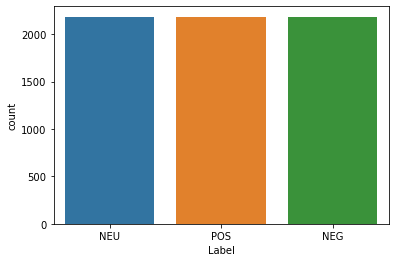

In [38]:
sns.countplot(data.Label)

In [39]:
len(data)

6552

In [40]:
data['Label'] = data['Label'].map({'NEG':0, 'NEU':1, 'POS':2})

In [42]:
data.to_csv('dataset_preprocessed_dws.csv', index=False)